In [411]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
#from IPython.display import display

DATA COLLECTION

In [412]:
train = pd.read_csv("train.csv")
test  = pd.read_csv("test.csv")
gender_submission=pd.read_csv("gender_submission.csv")
test_merge = pd.merge(test , gender_submission , on="PassengerId")

In [413]:
test_merge

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [414]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [415]:
train = pd.concat([train , test_merge])

In [416]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [417]:
train["PassengerId"] = train["PassengerId"].astype("object")
train["Survived"] = train["Survived"].astype("object")
train["Pclass"] = train["Pclass"].astype("object")

EDA

In [418]:
train.describe()

,Age,SibSp,Parch,Fare
count,1046.000000,1309.000000,1309.000000,1308.000000
mean,29.881138,0.498854,0.385027,33.295479
std,14.413493,1.041658,0.865560,51.758668
min,0.170000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,14.454200
75%,39.000000,1.000000,0.000000,31.275000
max,80.000000,8.000000,9.000000,512.329200


In [419]:
categorical_data =[col for col in train.columns if train[col].dtype == "object"]
categorical_data

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Ticket',
 'Cabin',
 'Embarked']

In [420]:
numerical_data =[col for col in train.columns if train[col].dtype != "object"]
numerical_data

['Age', 'SibSp', 'Parch', 'Fare']

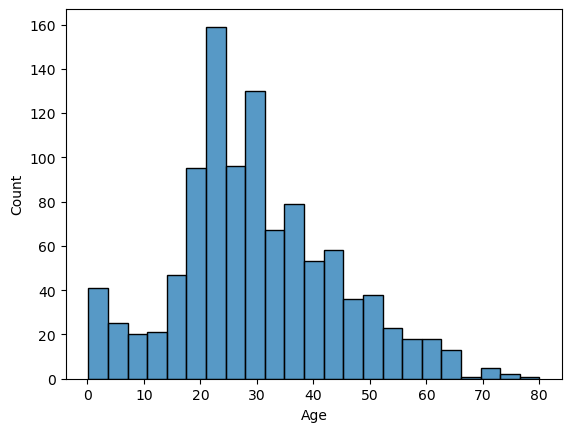

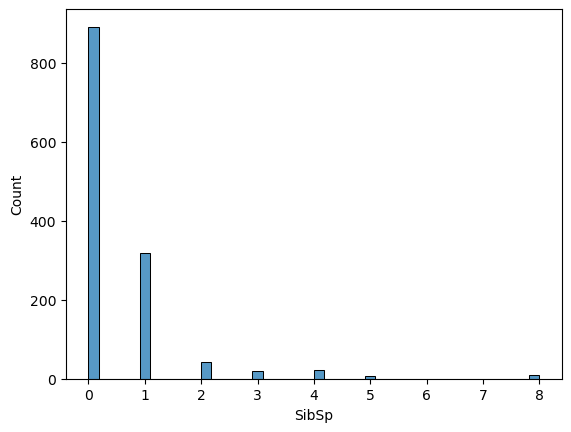

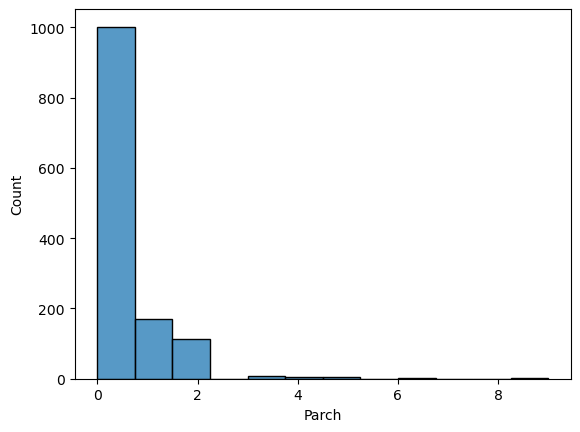

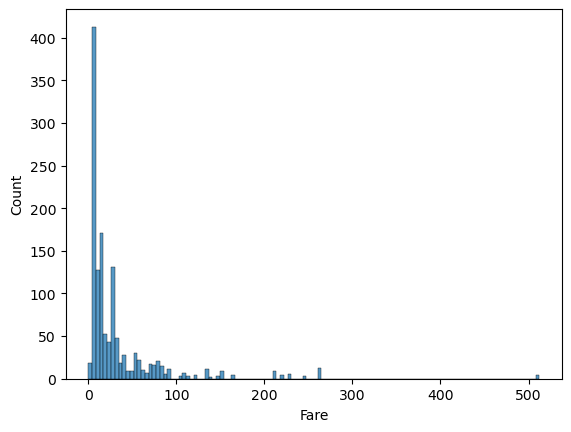

In [421]:
for x in numerical_data:
    sns.histplot(train[x])
    plt.show()

<AxesSubplot:>

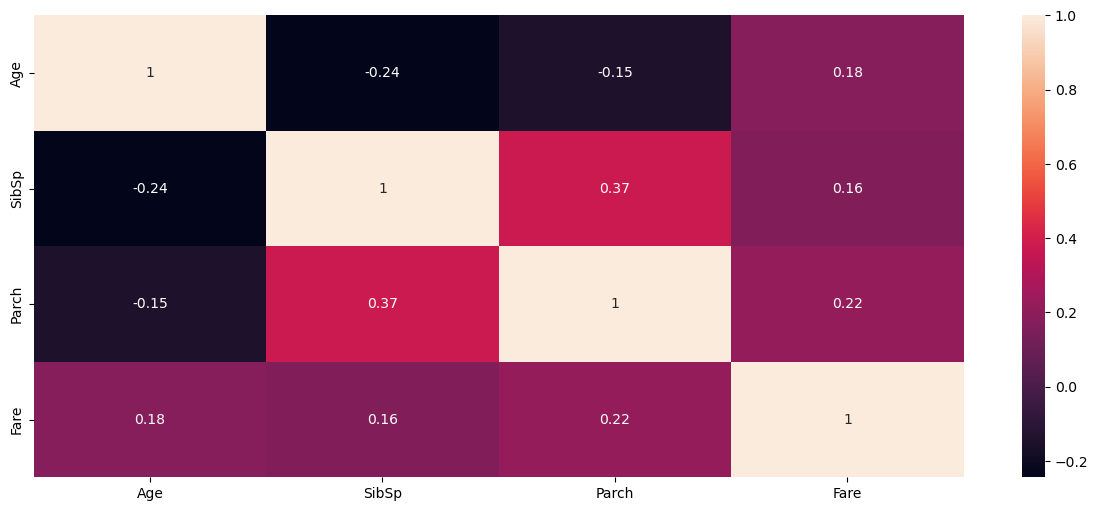

In [422]:
plt.figure(figsize=((15,6)))
sns.heatmap(train[numerical_data].corr(), annot=True)

In [423]:
pd.pivot_table(train ,index="Survived",values=numerical_data)

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.510986,23.879124,0.311656,0.496933
1,28.931079,48.811497,0.506073,0.502024


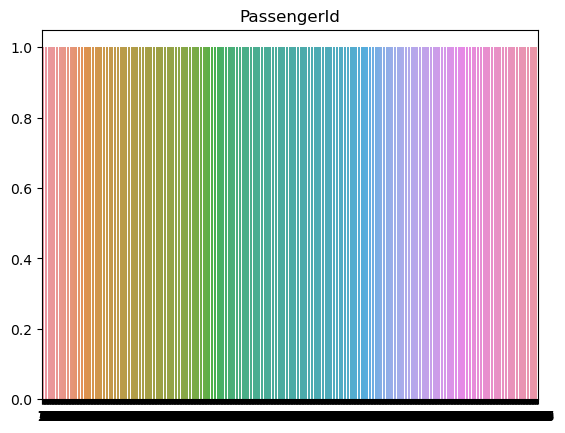

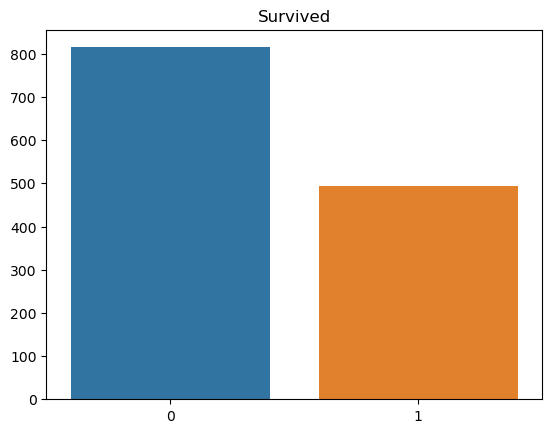

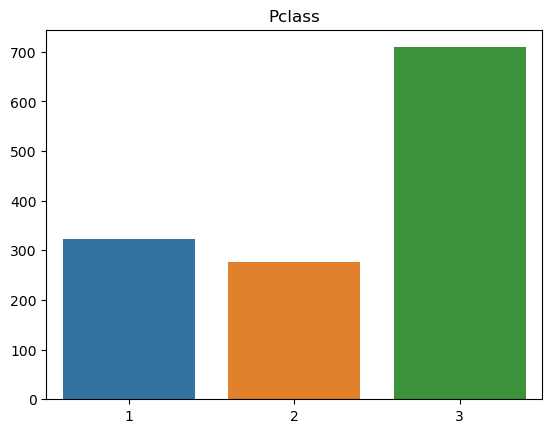

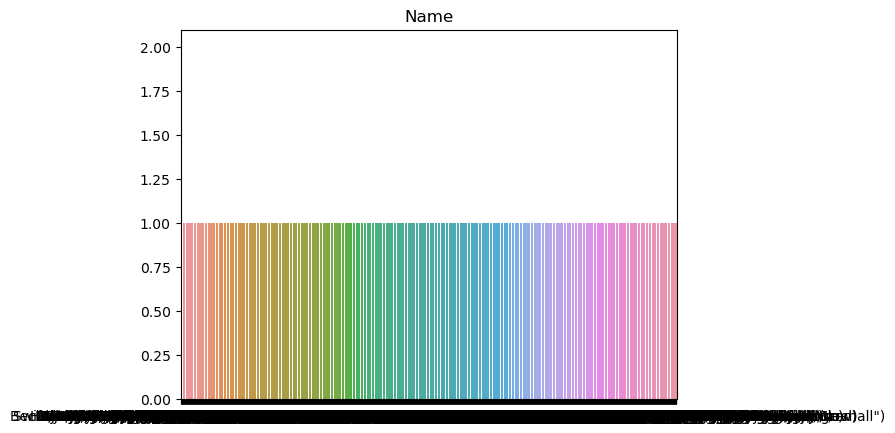

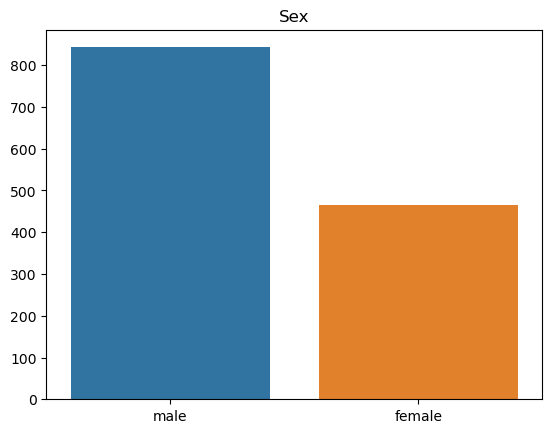

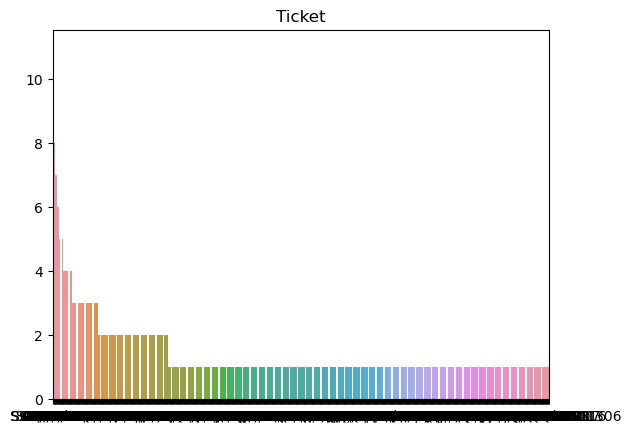

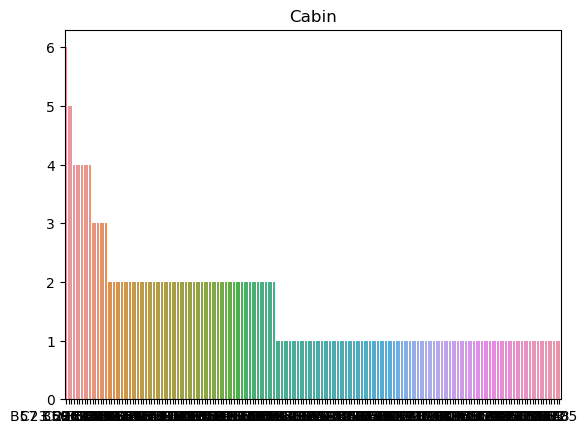

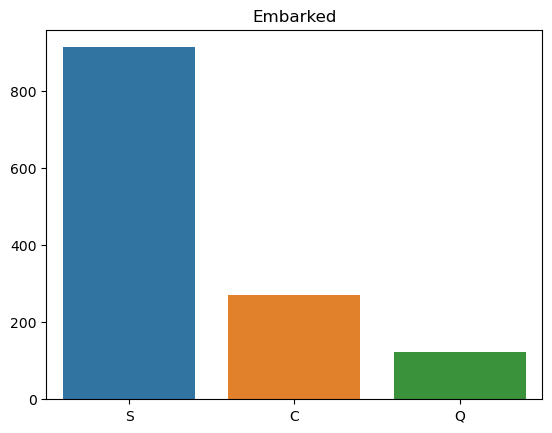

In [424]:
for x in categorical_data:
    sns.barplot(data=train , x=train[x].value_counts().index , y=train[x].value_counts().values)
    plt.show(plt.title(x))

In [425]:
display(train.groupby("Embarked").Survived.agg(["mean"]))
display(train.groupby("Pclass").Survived.agg(["mean"]))
display(train.groupby("Sex").Survived.agg(["mean"]))

,mean
Embarked,
C,0.492593
Q,0.439024
S,0.333698


,mean
Pclass,
1,0.575851
2,0.422383
3,0.269394


,mean
Sex,
female,0.82618
male,0.12930


FEATURE ENGINNERING

for cabin

In [426]:
cabin =train.Cabin
cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
413     NaN
414    C105
415     NaN
416     NaN
417     NaN
Name: Cabin, Length: 1309, dtype: object

In [427]:
train["multi_cabin"]= train.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(" ")))

In [428]:
train.multi_cabin

0      0
1      1
2      0
3      1
4      0
      ..
413    0
414    1
415    0
416    0
417    0
Name: multi_cabin, Length: 1309, dtype: int64

In [429]:
train.multi_cabin.value_counts()

0    1014
1     254
2      26
3      10
4       5
Name: multi_cabin, dtype: int64

In [430]:
display(train.groupby("multi_cabin").Survived.agg(["mean"]))

,mean
multi_cabin,
0,0.309665
1,0.622047
2,0.500000
3,0.600000
4,0.600000


for ticket

In [431]:
ticket = train.Ticket
ticket

0               A/5 21171
1                PC 17599
2        STON/O2. 3101282
3                  113803
4                  373450
              ...        
413             A.5. 3236
414              PC 17758
415    SOTON/O.Q. 3101262
416                359309
417                  2668
Name: Ticket, Length: 1309, dtype: object

In [432]:
train["new_ticket"] = train.Ticket.apply(lambda x : 'n' if x.isdigit() else x[0] )

In [433]:
train.new_ticket.value_counts()

n    957
P     98
S     98
C     77
A     42
W     19
F     13
L      5
Name: new_ticket, dtype: int64

In [434]:
display(train.groupby("new_ticket").Survived.agg(["mean"]))

,mean
new_ticket,
A,0.119048
C,0.350649
F,0.615385
L,0.200000
P,0.612245
S,0.316327
W,0.263158
n,0.373041


for name

In [435]:
name = train.Name
name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
413                                   Spector, Mr. Woolf
414                         Oliva y Ocana, Dona. Fermina
415                         Saether, Mr. Simon Sivertsen
416                                  Ware, Mr. Frederick
417                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [436]:
train["name_title"] = train.Name.apply(lambda x : x.split(',')[1].split(".")[0].strip() )

In [437]:
train.name_title.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: name_title, dtype: int64

In [438]:
display(train.groupby("name_title").Survived.agg(["mean"]))

,mean
name_title,
Capt,0.000000
Col,0.250000
Don,0.000000
Dona,1.000000
Dr,0.375000
Jonkheer,0.000000
Lady,1.000000
Major,0.500000
Master,0.377049


DATA PREPOCESSING

In [439]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   object 
 1   Survived     1309 non-null   object 
 2   Pclass       1309 non-null   object 
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  multi_cabin  1309 non-null   int64  
 13  new_ticket   1309 non-null   object 
 14  name_title   1309 non-null   object 
dtypes: float64(2), int64(3), object(10)
memory usage: 163.6+ KB


In [440]:
train.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
multi_cabin       0
new_ticket        0
name_title        0
dtype: int64

In [441]:
train.Age.fillna(np.mean(train.Age) , inplace=True)


In [442]:
train.drop("Cabin" ,axis=1, inplace=True)


In [443]:
train.dropna(inplace=True)

In [444]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1306 non-null   object 
 1   Survived     1306 non-null   object 
 2   Pclass       1306 non-null   object 
 3   Name         1306 non-null   object 
 4   Sex          1306 non-null   object 
 5   Age          1306 non-null   float64
 6   SibSp        1306 non-null   int64  
 7   Parch        1306 non-null   int64  
 8   Ticket       1306 non-null   object 
 9   Fare         1306 non-null   float64
 10  Embarked     1306 non-null   object 
 11  multi_cabin  1306 non-null   int64  
 12  new_ticket   1306 non-null   object 
 13  name_title   1306 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 153.0+ KB


In [445]:
train.drop(["PassengerId", "Name" ,"Ticket"],axis=1,inplace=True)

In [446]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     1306 non-null   object 
 1   Pclass       1306 non-null   object 
 2   Sex          1306 non-null   object 
 3   Age          1306 non-null   float64
 4   SibSp        1306 non-null   int64  
 5   Parch        1306 non-null   int64  
 6   Fare         1306 non-null   float64
 7   Embarked     1306 non-null   object 
 8   multi_cabin  1306 non-null   int64  
 9   new_ticket   1306 non-null   object 
 10  name_title   1306 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 122.4+ KB


MODELING

In [447]:
x = train.drop("Survived" , axis=1)
y = train["Survived"]

In [448]:
y = y.astype("int64") 

In [449]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       1306 non-null   object 
 1   Sex          1306 non-null   object 
 2   Age          1306 non-null   float64
 3   SibSp        1306 non-null   int64  
 4   Parch        1306 non-null   int64  
 5   Fare         1306 non-null   float64
 6   Embarked     1306 non-null   object 
 7   multi_cabin  1306 non-null   int64  
 8   new_ticket   1306 non-null   object 
 9   name_title   1306 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 112.2+ KB


In [450]:
categorical=[col for col in x.columns if x[col].dtype == "object"]
categorical

['Pclass', 'Sex', 'Embarked', 'new_ticket', 'name_title']

In [451]:
x[categorical] = x[categorical].astype(str)
x = pd.get_dummies(x, columns=categorical)

In [452]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 417
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1306 non-null   float64
 1   SibSp                    1306 non-null   int64  
 2   Parch                    1306 non-null   int64  
 3   Fare                     1306 non-null   float64
 4   multi_cabin              1306 non-null   int64  
 5   Pclass_1                 1306 non-null   uint8  
 6   Pclass_2                 1306 non-null   uint8  
 7   Pclass_3                 1306 non-null   uint8  
 8   Sex_female               1306 non-null   uint8  
 9   Sex_male                 1306 non-null   uint8  
 10  Embarked_C               1306 non-null   uint8  
 11  Embarked_Q               1306 non-null   uint8  
 12  Embarked_S               1306 non-null   uint8  
 13  new_ticket_A             1306 non-null   uint8  
 14  new_ticket_C             

In [453]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [454]:
model = LogisticRegression()
cvs  = cross_val_score(model,x_scaled ,y ,cv=5)
cvs

array([0.80916031, 0.82375479, 0.7816092 , 0.91570881, 0.95019157])

In [455]:
cvs.mean()

0.8560849346319207

In [456]:
model2 = SVC(kernel="rbf")
cvs  = cross_val_score(model2,x_scaled ,y ,cv=5)
cvs

array([0.82824427, 0.81226054, 0.75478927, 0.91570881, 0.95019157])

In [457]:
cvs.mean()

0.8522388932760083

In [458]:
model3 = LinearSVC(max_iter=1000)
cvs  = cross_val_score(model3,x_scaled ,y ,cv=5)
cvs

e:\anaconda install\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
e:\anaconda install\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
e:\anaconda install\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
e:\anaconda install\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
e:\anaconda install\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([0.80152672, 0.81226054, 0.7816092 , 0.91570881, 0.95785441])

In [459]:
cvs.mean()

0.8537919335497646